# Prepare data 

### Imports

In [679]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA

In [680]:
df= pd.read_csv('../../Data/training.csv')
df2= pd.read_csv('../../Data/training.csv')
print ('shape of df :' ,  df.shape)

shape of df : (95662, 16)


## Data Cleaning

### Useless features removal

In [681]:
# Drop the columns that are not needed
df.drop(['CurrencyCode', 
         'CountryCode', 
         'TransactionId', 
         'Amount'], axis=1, inplace=True)

### Time conversion

In [682]:
# Isolate Date and Time
df['TransactionStartTime'] = pd.to_datetime(df['TransactionStartTime'])
df['Hour'] = df['TransactionStartTime'].dt.time
df.drop(['TransactionStartTime'], axis=1, inplace=True)

# Convert Time to int & only keep the hour, no minutes
df['Hour'] = df['Hour'].astype(str).str[:2].astype(int)

# Convert time into 4 categories; 4-11, 12-13, 14-19, 20-3
df['Hour'] = df['Hour'].apply(lambda x: 25 if x in range(0,4) else x)
df['Hour'] = df['Hour'].apply(lambda x: 1 if x in range(4,12) else x) 
df['Hour'] = df['Hour'].apply(lambda x: 2 if x in range(14,20) else x)
df['Hour'] = df['Hour'].apply(lambda x: 3 if x in range(12,14) else x)
df['Hour'] = df['Hour'].apply(lambda x: 25 if x in range(20,24) else x)
df['Hour'] = df['Hour'].apply(lambda x: 4 if x == 25 else x)

print ('\n ---------------- \n Shape \n',df.shape)


 ---------------- 
 Shape 
 (95662, 12)


### Values cleaning
Strings removal from cells

In [683]:

df['AccountId'] = df['AccountId'].str.split('_').str[1]
df['BatchId'] = df['BatchId'].str.split('_').str[1]
df['SubscriptionId'] = df['SubscriptionId'].str.split('_').str[1]
df['CustomerId'] = df['CustomerId'].str.split('_').str[1]
df['ProviderId'] = df['ProviderId'].str.split('_').str[1]
df['ProductId'] = df['ProductId'].str.split('_').str[1]
df['ChannelId'] = df['ChannelId'].str.split('_').str[1]

df.head()

,BatchId,AccountId,SubscriptionId,CustomerId,ProviderId,ProductId,ProductCategory,ChannelId,Value,PricingStrategy,FraudResult,Hour
0,36123,3957,887,4406,6,10,airtime,3,1000,2,0,4
1,15642,4841,3829,4406,4,6,financial_services,2,20,2,0,4
2,53941,4229,222,4683,6,1,airtime,3,500,2,0,4
3,102363,648,2185,988,1,21,utility_bill,3,21800,2,0,4
4,38780,4841,3829,988,4,6,financial_services,2,644,2,0,4


### Hot one encoding
Convert categorical data to numerical data

In [684]:
df = pd.get_dummies(df, columns=['ProductCategory'])
df = pd.get_dummies(df, columns=['ChannelId'])
df = pd.get_dummies(df, columns=['ProviderId'])
df = pd.get_dummies(df, columns=['Hour'])

df.head()

,BatchId,AccountId,SubscriptionId,CustomerId,ProductId,Value,PricingStrategy,FraudResult,ProductCategory_airtime,ProductCategory_data_bundles,...,ProviderId_1,ProviderId_2,ProviderId_3,ProviderId_4,ProviderId_5,ProviderId_6,Hour_1,Hour_2,Hour_3,Hour_4
0,36123,3957,887,4406,10,1000,2,0,1,0,...,0,0,0,0,0,1,0,0,0,1
1,15642,4841,3829,4406,6,20,2,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,53941,4229,222,4683,1,500,2,0,1,0,...,0,0,0,0,0,1,0,0,0,1
3,102363,648,2185,988,21,21800,2,0,0,0,...,1,0,0,0,0,0,0,0,0,1
4,38780,4841,3829,988,6,644,2,0,0,0,...,0,0,0,1,0,0,0,0,0,1


### Move Fraud to last item of dataframes

In [685]:
df['Fraud'] = df['FraudResult']
df.drop(['FraudResult'], axis=1, inplace=True)

### Spliting dataset 4 training & testing
- Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly
if the individual features do not more or less look like standard normally distributed data 

    (e.g. Gaussian with 0 mean and unit variance).
- Many elements used in learning algorithm assume that features are centered around 0 & have variance in the same order. 
  
    If a feature has a variance that is orders of magnitude larger than others, it might dominate the objective function 
and make the estimator unable to learn from other features correctly as expected.

In [686]:
X = df.drop(['Fraud'], axis=1)
y = df['Fraud']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

### Data comparaison after scaling

In [687]:
X_train_scaled[:1]

array([[-1.59741808,  0.9488323 ,  0.62172702,  0.71863485, -0.30285366,
        -0.08069323, -0.34828019, -0.94326291, -0.13099192,  1.05223193,
        -0.04250289, -0.0051122 , -0.0475994 , -0.01695746, -0.11605196,
        -0.14311503, -0.0733014 ,  1.255888  , -1.21320523, -0.10641989,
        -0.25112784, -0.01352666, -0.18338736,  1.22676767, -0.42222695,
        -0.74584845,  1.1606392 , -0.80501754, -0.35000665, -0.27766805]])

In [688]:
X_train.head()

,BatchId,AccountId,SubscriptionId,CustomerId,ProductId,Value,PricingStrategy,ProductCategory_airtime,ProductCategory_data_bundles,ProductCategory_financial_services,...,ProviderId_1,ProviderId_2,ProviderId_3,ProviderId_4,ProviderId_5,ProviderId_6,Hour_1,Hour_2,Hour_3,Hour_4
59096,5730,4841,3829,4312,6,100,2,0,0,1,...,0,0,0,1,0,0,1,0,0,0
35991,3209,1270,4526,1632,10,5000,2,1,0,0,...,0,0,0,0,0,1,0,1,0,0
69457,127344,1796,913,2186,3,1000,2,1,0,0,...,0,0,0,0,0,1,0,1,0,0
58498,13153,4841,3829,3876,6,70,2,0,0,1,...,0,0,0,1,0,0,1,0,0,0
88790,15503,2659,3327,3078,10,20000,2,1,0,0,...,0,0,0,0,0,1,1,0,0,0


## Features Importance 
https://betterdatascience.com/feature-importance-python/?utm_content=cmp-true

### using logistic regression
- Larger coeff -> more influence etither positive/negative values
- logistic regression is suitable for classification
- the data needs to be  scaled

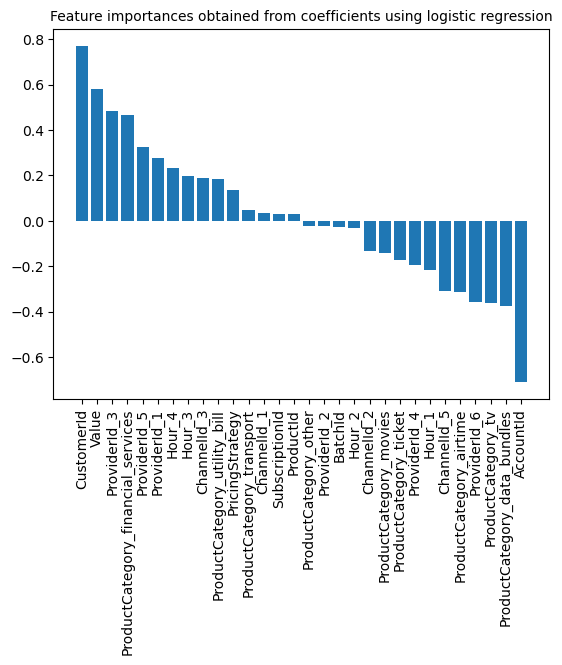

In [689]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={'Attribute': X_train.columns,'Importance': model.coef_[0]})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'])
plt.title('Feature importances obtained from coefficients using logistic regression', size=10)
plt.xticks(rotation='vertical')
plt.show()

### using tree besed model
- may be biased due to the approach of "inflating" the importance of continuous features
- Import the module using  ```conda install -c anaconda py-xgboost``` in your terminal

/Users/dave/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:39:41] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


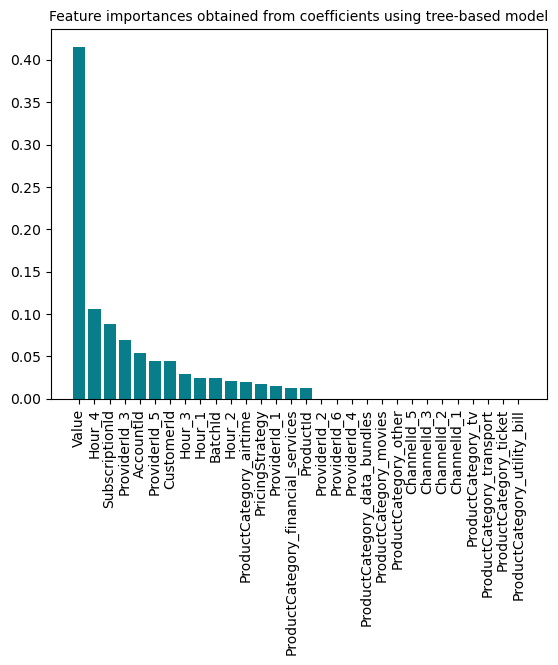

In [690]:
from xgboost import XGBClassifier

model = XGBClassifier()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)
plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients using tree-based model', size=10)
plt.xticks(rotation='vertical')
plt.show()

### using PCA

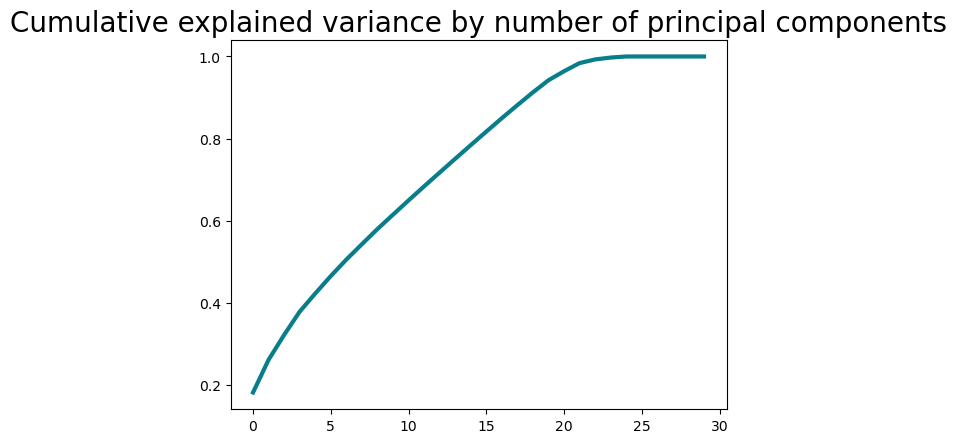

In [691]:
pca = PCA().fit(X_train_scaled)

plt.plot(pca.explained_variance_ratio_.cumsum(), lw=3, color='#087E8B')
plt.title('Cumulative explained variance by number of principal components', size=20)
plt.show()

pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

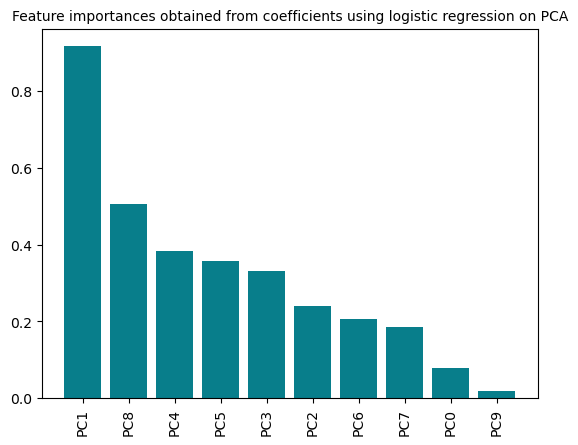

In [692]:
model = LogisticRegression()
model.fit(X_train_pca, y_train)
importances = pd.DataFrame(data={
    'Attribute': ['PC{}'.format(i) for i in range(X_train_pca.shape[1])],
    'Importance': np.abs(model.coef_[0])
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients using logistic regression on PCA', size=10)
plt.xticks(rotation='vertical')
plt.show()

/Users/dave/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[03:39:44] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


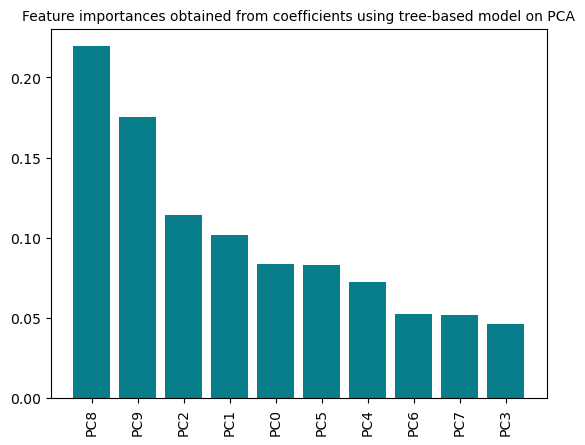

In [693]:
model = XGBClassifier()
model.fit(X_train_pca, y_train)
importances = pd.DataFrame(data={
    'Attribute': ['PC{}'.format(i) for i in range(X_train_pca.shape[1])],
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients using tree-based model on PCA', size=10)
plt.xticks(rotation='vertical')
plt.show()

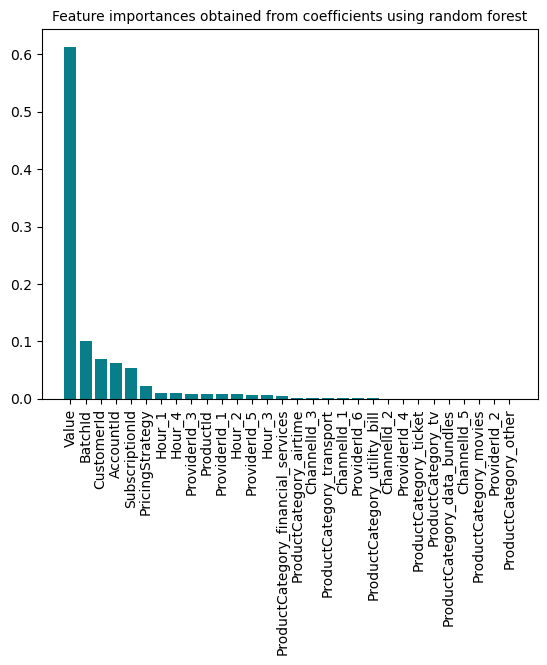

In [694]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

plt.bar(x=importances['Attribute'], height=importances['Importance'], color='#087E8B')
plt.title('Feature importances obtained from coefficients using random forest', size=10)
plt.xticks(rotation='vertical')
plt.show()

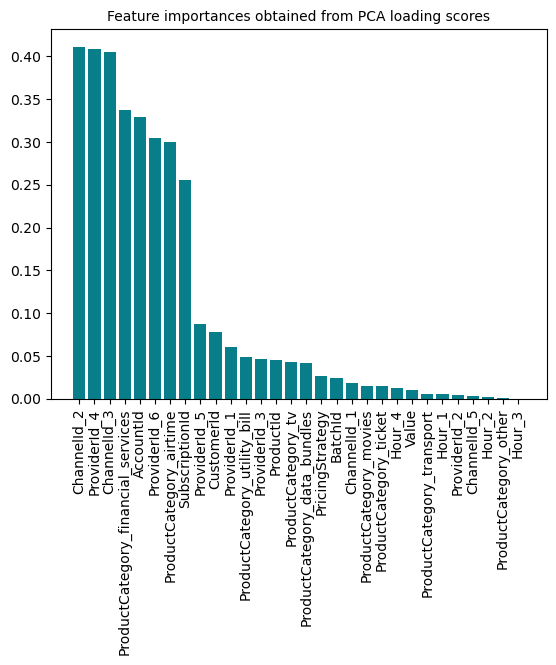

In [695]:
# obtain important features using PCA loading scores


pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_scaled)
X_train_pca = pd.DataFrame(data=X_train_pca, columns=['PC1', 'PC2'])
loadings = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'PC1': pca.components_[0],
    'PC2': pca.components_[1]
})
loadings['PC1'] = loadings['PC1'].abs()
loadings['PC2'] = loadings['PC2'].abs()
loadings = loadings.sort_values(by='PC1', ascending=False)

plt.bar(x=loadings['Attribute'], height=loadings['PC1'], color='#087E8B')
plt.title('Feature importances obtained from PCA loading scores', size=10)
plt.xticks(rotation='vertical')
plt.show()

/var/folders/wj/ptff1vp12y59z_rr8m2h5r040000gn/T/ipykernel_71000/1357745370.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df.corr()


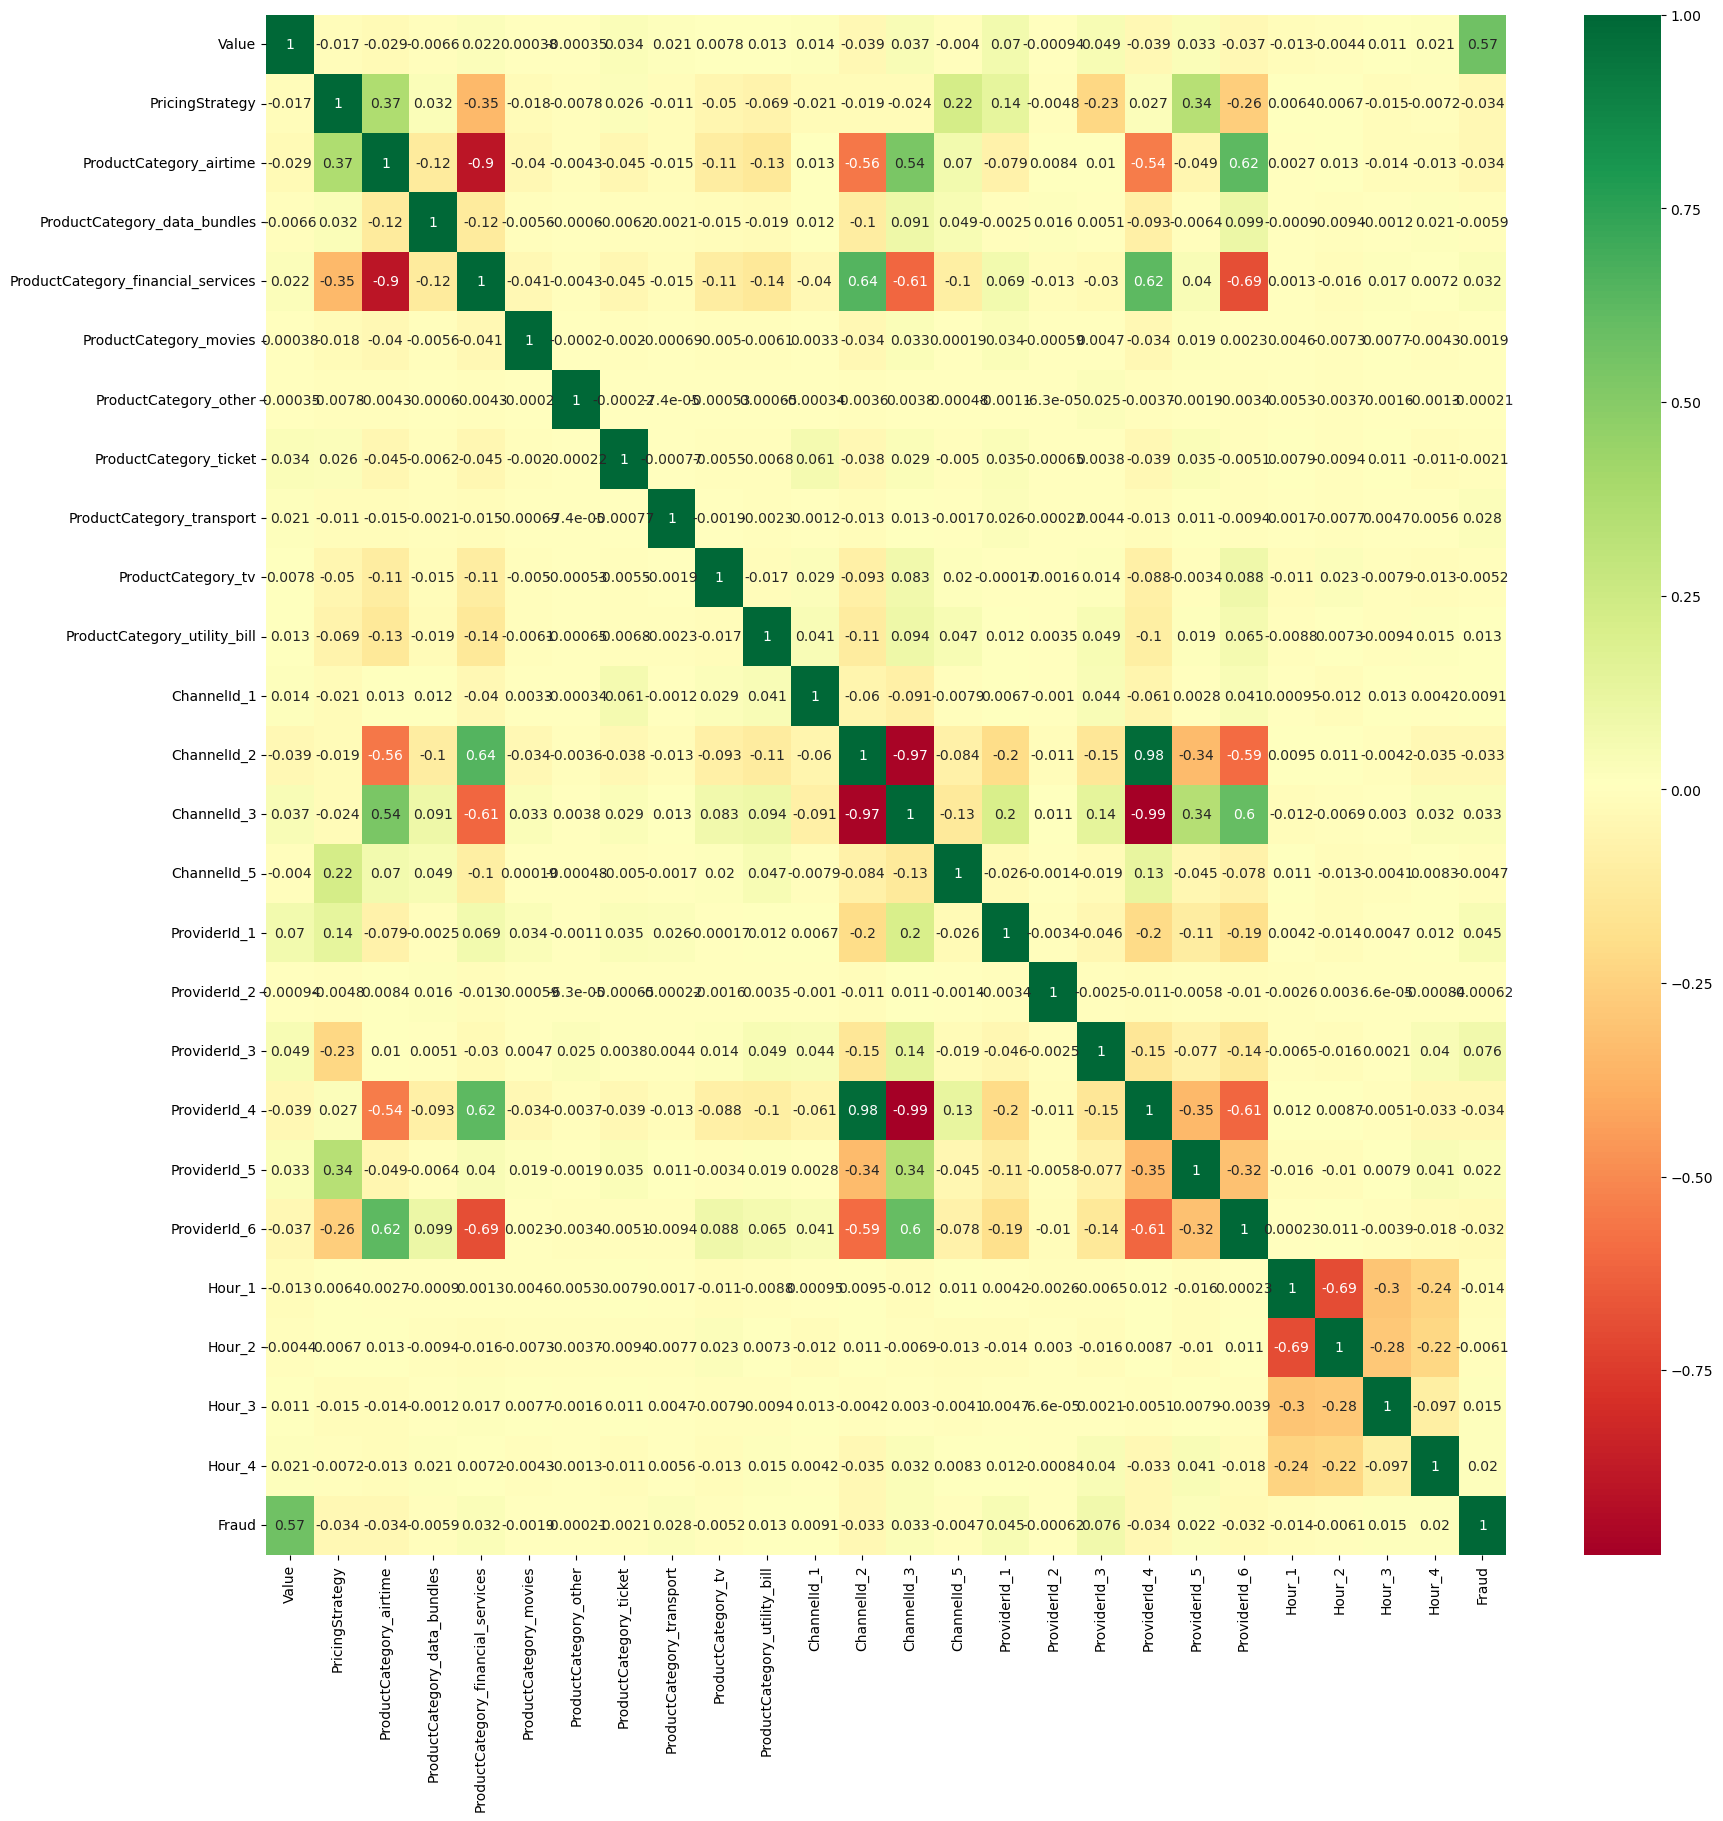

In [696]:
# Correlation matrix
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

plt.show()

## Oversampling
Resolve imbalanced dataset issue

### SMOTE

In [697]:
from imblearn.over_sampling import SMOTE
from collections import Counter

print('Original dataset shape {}'.format(Counter(y_train)))
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 76372, 1: 157})
Resampled dataset shape Counter({0: 76372, 1: 76372})


[8.56099111e-03 1.94957825e-02 1.43291329e-02 1.10158021e-02
 4.98903243e-02 1.33118647e-01 3.65571180e-02 1.59154891e-01
 4.05043936e-03 3.44891887e-02 4.43763454e-04 1.45534356e-05
 7.06934821e-04 1.21403621e-04 4.02555352e-03 4.24702512e-03
 1.08591412e-03 9.24974507e-02 3.45194471e-02 8.09423007e-04
 1.18125523e-02 4.69734066e-05 1.28709171e-02 1.18755615e-01
 3.67856398e-02 1.13962078e-01 4.77695629e-02 3.13382339e-02
 1.02711440e-02 7.25349714e-03]
ProductCategory_airtime               0.159155
Value                                 0.133119
ProviderId_4                          0.118756
ProviderId_6                          0.113962
ChannelId_2                           0.092497
ProductId                             0.049890
Hour_1                                0.047770
ProviderId_5                          0.036786
PricingStrategy                       0.036557
ChannelId_3                           0.034519
ProductCategory_financial_services    0.034489
Hour_2                  

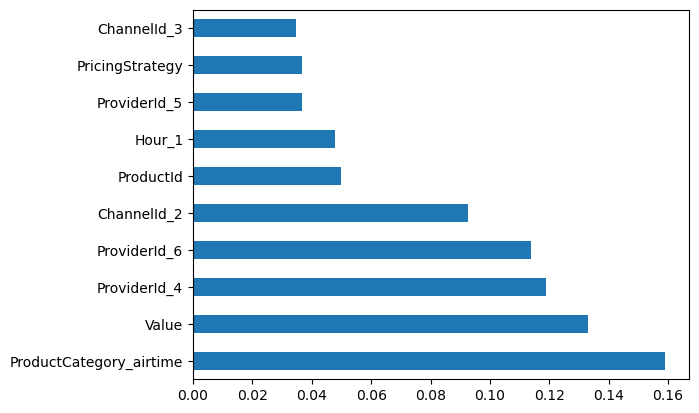

In [698]:
# Feature importance
model = ExtraTreesClassifier()
model.fit(X_res,y_res)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
print (feat_importances.nlargest(20))
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [699]:
# comparaison
print("x_res: \t\t", type(X_res))
print("y_res: \t\t",type(y_res))
print("X_train: \t",type(X_train))
print("y_train: \t",type(y_train))

x_res: 		 <class 'pandas.core.frame.DataFrame'>
y_res: 		 <class 'pandas.core.series.Series'>
X_train: 	 <class 'pandas.core.frame.DataFrame'>
y_train: 	 <class 'pandas.core.series.Series'>


In [700]:
X_train.head()

,BatchId,AccountId,SubscriptionId,CustomerId,ProductId,Value,PricingStrategy,ProductCategory_airtime,ProductCategory_data_bundles,ProductCategory_financial_services,...,ProviderId_1,ProviderId_2,ProviderId_3,ProviderId_4,ProviderId_5,ProviderId_6,Hour_1,Hour_2,Hour_3,Hour_4
59096,5730,4841,3829,4312,6,100,2,0,0,1,...,0,0,0,1,0,0,1,0,0,0
35991,3209,1270,4526,1632,10,5000,2,1,0,0,...,0,0,0,0,0,1,0,1,0,0
69457,127344,1796,913,2186,3,1000,2,1,0,0,...,0,0,0,0,0,1,0,1,0,0
58498,13153,4841,3829,3876,6,70,2,0,0,1,...,0,0,0,1,0,0,1,0,0,0
88790,15503,2659,3327,3078,10,20000,2,1,0,0,...,0,0,0,0,0,1,1,0,0,0


In [701]:
X_res.head()

,BatchId,AccountId,SubscriptionId,CustomerId,ProductId,Value,PricingStrategy,ProductCategory_airtime,ProductCategory_data_bundles,ProductCategory_financial_services,...,ProviderId_1,ProviderId_2,ProviderId_3,ProviderId_4,ProviderId_5,ProviderId_6,Hour_1,Hour_2,Hour_3,Hour_4
0,5730.0,4841.0,3829.0,4312.0,6.0,100,2,0,0,1,...,0,0,0,1,0,0,1,0,0,0
1,3209.0,1270.0,4526.0,1632.0,10.0,5000,2,1,0,0,...,0,0,0,0,0,1,0,1,0,0
2,127344.0,1796.0,913.0,2186.0,3.0,1000,2,1,0,0,...,0,0,0,0,0,1,0,1,0,0
3,13153.0,4841.0,3829.0,3876.0,6.0,70,2,0,0,1,...,0,0,0,1,0,0,1,0,0,0
4,15503.0,2659.0,3327.0,3078.0,10.0,20000,2,1,0,0,...,0,0,0,0,0,1,1,0,0,0


## Extra

fraudulent graph hours

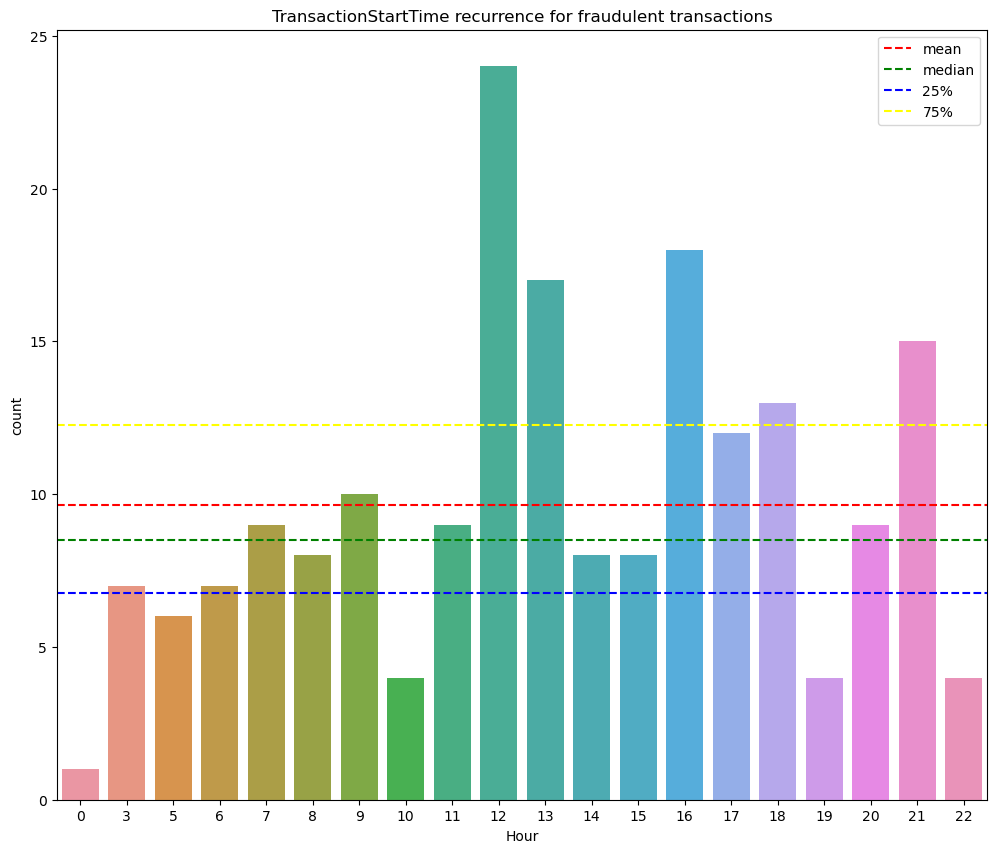

In [702]:
# Isolate Date and Time
df2['TransactionStartTime'] = pd.to_datetime(df2['TransactionStartTime'])
df2['Hour'] = df2['TransactionStartTime'].dt.time
# Convert Time to int & only keep the hour, no minutes
df2['Hour'] = df2['Hour'].astype(str).str[:2].astype(int)

# keep frauds only
df_fraud_only = df2[df2['FraudResult'] == 1]


# plot bar the recurrence of each TransactionStartTime value
plt.figure(figsize=(12,10))
sns.countplot(x='Hour', data=df_fraud_only)

#plot a line in the ghaph for the mean of the recurrence of each TransactionStartTime value
plt.axhline(df_fraud_only['Hour'].value_counts().mean(), color='red', linestyle='--', label='mean')

## plot a line in the ghaph for the median of the recurrence of each TransactionStartTime value
plt.axhline(df_fraud_only['Hour'].value_counts().median(), color='green', linestyle='--', label='median')

#plot a line in the ghaph for 25% of the recurrence of each TransactionStartTime value
plt.axhline(df_fraud_only['Hour'].value_counts().quantile(0.25), color='blue', linestyle='--', label='25%')

#plot a line in the ghaph for 75% of the recurrence of each TransactionStartTime value show a description of the line in the legend
plt.axhline(df_fraud_only['Hour'].value_counts().quantile(0.75), color='yellow', linestyle='--', label='75%')

plt.legend()
plt.title('TransactionStartTime recurrence for fraudulent transactions')
plt.savefig('../Report/images/TransactionStartTime_recurrence_fraud.png')
plt.show()